# Exploring Willy Wonka

### Introduction

### Reading prompt

* Summary - The data does not reveal much difference between our power users (who account for 80% of )and the normal users.  
* More research needed on the power users -- what keeps them returning?  What other similar competitors do they shop at, and can we offer more similar products.
* There is a small difference in product preference, with users spending on healthy food like energy shots, and protein..whereas non-power users spend more on granola bars.
* Odd that the marketing emphasizes things like chocolate whereas users appear to be more health conscious.
* Top loyalty program is silver followed by none -- so appears that gold and bronze are underperforming.


In [31]:
from lib import load_data
import pandas as pd

engine, df = load_data()
df[:1]

,index,order_id,list_lineitem_id,user_id,order_date,order_value,order_item_count,order_single_item,order_channel,order_coupon_code,...,order_store_city,order_store_id,order_day_part,order_is_freeshipping,user_loyalty_program,user_age,user_gender,list_sku,list_sku_category,list_sku_flavor
0,0,TXN-52889719,"ITEM-2008965888,ITEM-2009089674",USER-16961214,2021-05-04,49.325488,2,False,digital_direct,express5,...,Dallas,Dallas-3,evening,1,bronze,49,F,SKU-3002,Energy Bar,Peanut Butter


In [32]:
grouped_users = df.groupby(['user_id']).sum().sort_values('order_value', ascending = False)['order_value']

In [33]:
percentile_users = grouped_users.cumsum()/grouped_users.sum()

* Core users

In [34]:
core_users = percentile_users[percentile_users < .90][percentile_users > .3]

# core_users

* Power users

In [35]:
power_users = percentile_users[percentile_users < .30]

In [36]:
df.index = df.user_id

In [37]:
power_user_orders_df = df.loc[power_users.index]

In [38]:
core_user_orders_df = df.loc[core_users.index]
core_user_orders_df[:2]

,index,order_id,list_lineitem_id,user_id,order_date,order_value,order_item_count,order_single_item,order_channel,order_coupon_code,...,order_store_city,order_store_id,order_day_part,order_is_freeshipping,user_loyalty_program,user_age,user_gender,list_sku,list_sku_category,list_sku_flavor
user_id,,,,,,,,,,,,,,,,,,,,,
USER-17214547,51138,TXN-53266248,"ITEM-2008999443,ITEM-2009145590,ITEM-2009239113",USER-17214547,2021-04-20,77.307896,3,False,digital_direct,None,...,Los Angeles,LosAngeles-2,evening,0,silver,30,F,SKU-3011,Granola Bar,Chocolate Brownie
USER-17214547,163982,TXN-53266248,"ITEM-2008999443,ITEM-2009145590,ITEM-2009239113",USER-17214547,2021-04-20,77.307896,3,False,digital_direct,None,...,Los Angeles,LosAngeles-2,evening,0,silver,30,F,SKU-5002,Granola Bite,Strawberry Cheesecake


list_sku_category


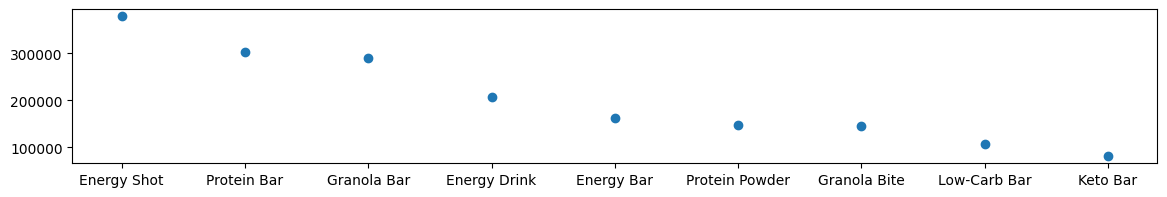

In [42]:
from lib import build_grouped_bys, group_and_print, timing_cols, product_cols, marketing_cols, location_cols

user_cols = ['user_age', 'user_gender']

group_and_print(power_user_orders_df, product_cols[1:2])

list_sku_category


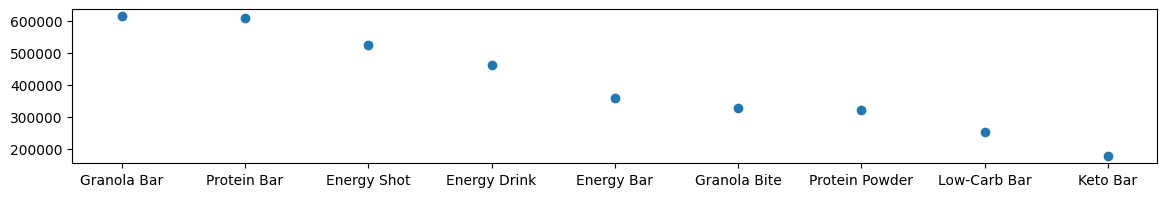

In [44]:
group_and_print(core_user_orders_df, product_cols[1:2])

order_channel


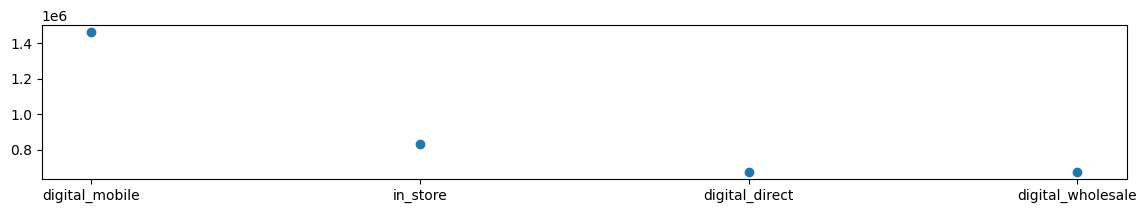

order_referrer


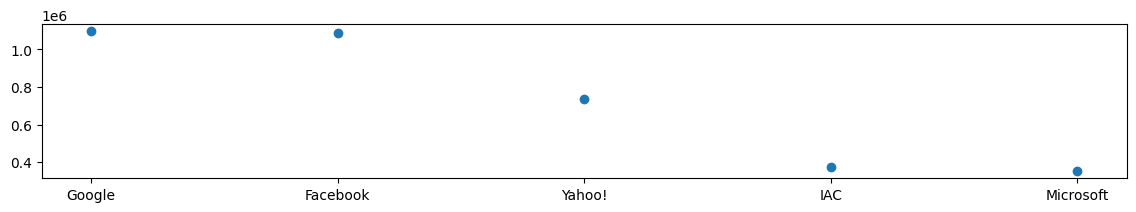

order_ad_shown


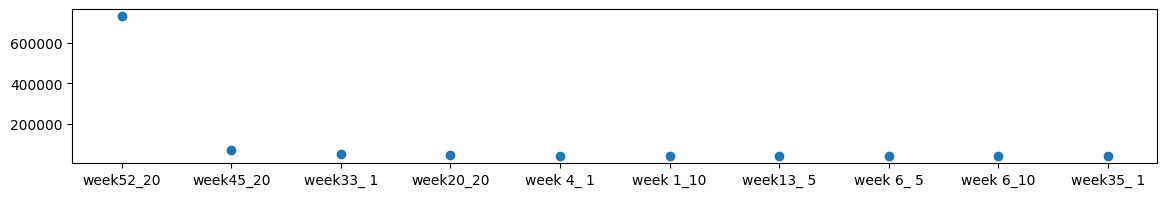

order_is_freeshipping


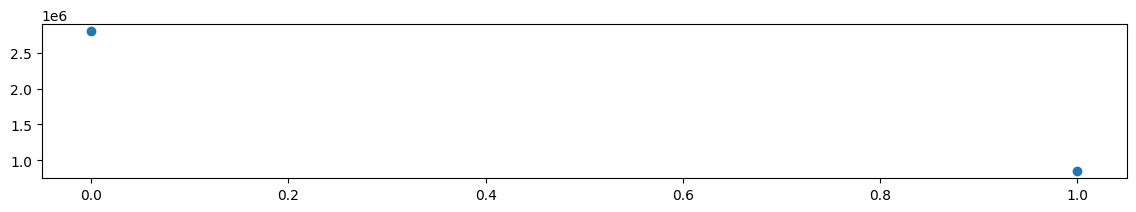

order_coupon_code


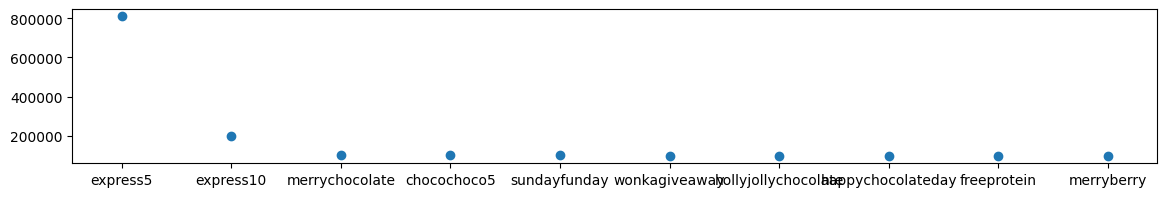

user_loyalty_program


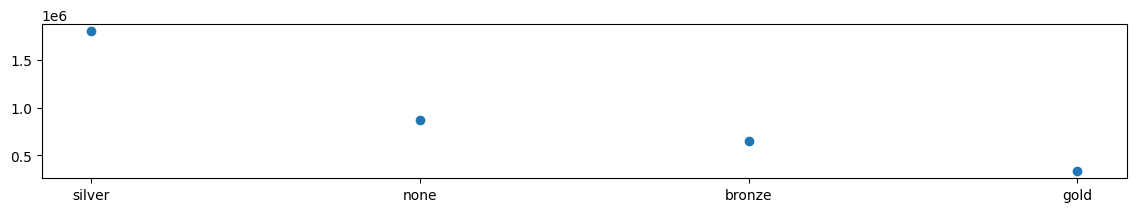

In [45]:
group_and_print(core_user_orders_df, marketing_cols)

order_channel


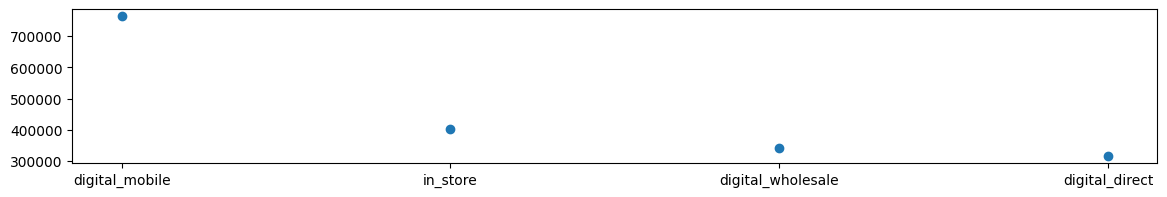

order_referrer


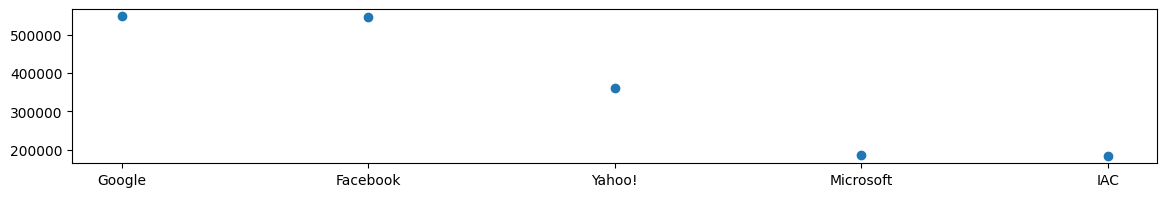

order_ad_shown


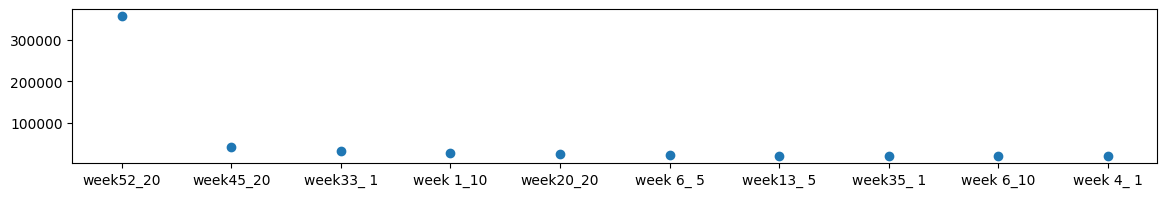

order_is_freeshipping


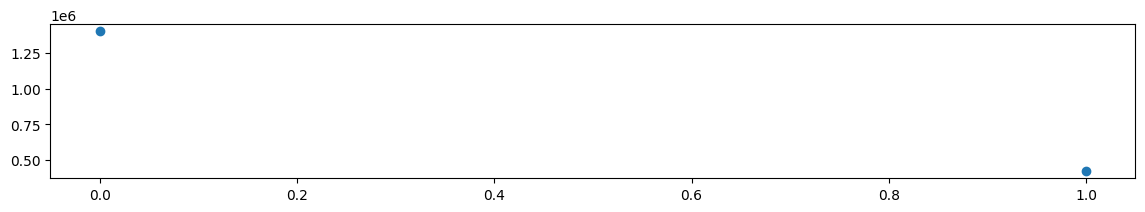

order_coupon_code


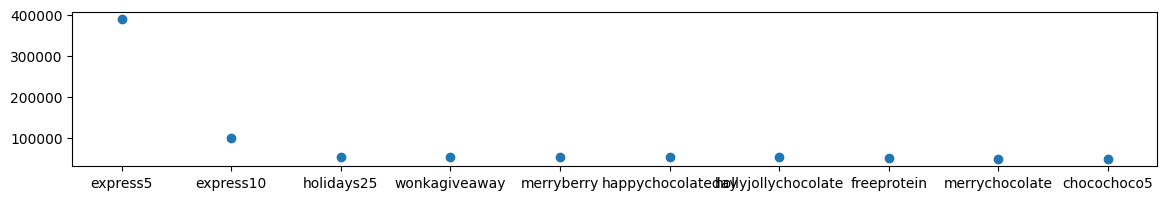

user_loyalty_program


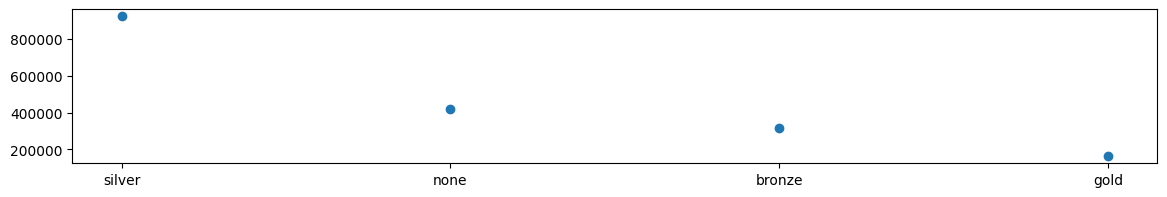

In [46]:
group_and_print(power_user_orders_df, marketing_cols)